In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from mpl_toolkits import mplot3d

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.graphics.gofplots import ProbPlot

%matplotlib inline

## Chapter 3
### Lab
#### Simple Linear Regression

In [2]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['MEDV'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [83]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [84]:
X = bos[['LSTAT']] # It is necessary to pass a list of a list for the X values in order to fit the linear regression model 
y = bos['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train) # I'm deviating from the ISLR lab to display that when using python we are interested in predictions rather than just inference

LinearRegression()

In [85]:
coeffecients = pd.DataFrame(lm.coef_,X.columns) # Pandas and Numpy do not support a function like R's summary so we will look at the values separately 
coeffecients.columns = ['Coefficient']
coeffecients # Look at the coeffificent values in a dataframe format for ease 
# Look up the package statsmodels to find the function OLS that performs a similar function as R's summary function

,Coefficient
LSTAT,-0.943962


In [86]:
print('Intercept: {:.4}'.format(lm.intercept_)) 

Intercept: 34.0


In [87]:
y_pred = lm.predict(X_test) # We set the predicted values to y_pred then we can look at some metrics and plots to see how our model performed on the data

In [88]:
print('Mean Squared Error {:.4}, Coefficient of Determination {:.4}'.format(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Mean Squared Error 51.51, Coefficient of Determination 0.474


Text(0.5, 1.0, 'Prediction Line of Best Fit')

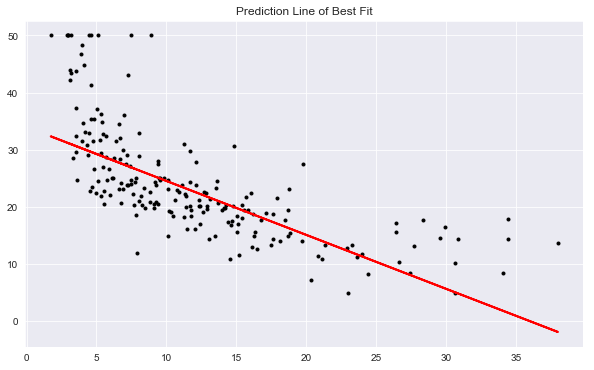

In [89]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='black', marker='.')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.title('Prediction Line of Best Fit') # The data seems to be more complex and we may need to change our model to something non-linear (ex. polynomial)

Text(0, 0.5, 'Predictions')

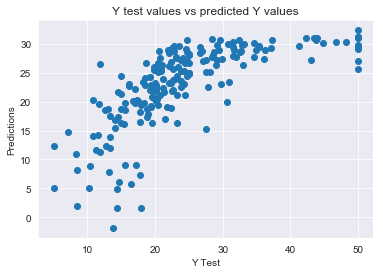

In [90]:
plt.scatter(y_test, y_pred)
plt.title('Y test values vs predicted Y values')
plt.xlabel('Y Test')
plt.ylabel('Predictions') # The test set vs our predictions show that the model did not perform well and some evidence of non-linearity

Text(0.5, 1.0, 'Histogram of Residuals')

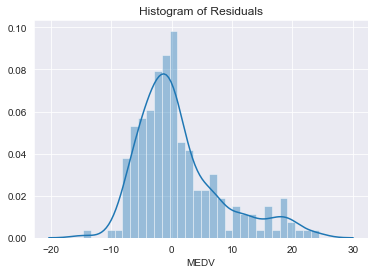

In [91]:
sns.distplot((y_test - y_pred), bins=30)
plt.title('Histogram of Residuals') # We can see the residuals are not normally distributed, this suggests the data is not suited for a linear model 

#### Multiple Linear Regression

In [92]:
X = bos[['LSTAT', 'AGE']] # MLR is as simple as adding more columns into the X dataframe
y = bos['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression()

In [94]:
coeffecients = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
coeffecients

,Coefficients
LSTAT,-1.037839
AGE,0.040018


In [9]:
y_pred = lm.predict(X_test)

In [10]:
print('Mean Squared Error {:.4}, Coefficient of Determination {:.4}'.format(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Mean Squared Error 51.3, Coefficient of Determination 0.4761


In [30]:
X = bos.drop('MEDV', axis=1) # To obtain variable except the target we can use the drop function specifying axis=1 (column) rather than typiing out every column 
y = bos['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression()

In [96]:
coefficients = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
coefficients

,Coefficients
LSTAT,-1.037839
AGE,0.040018


In [32]:
y_pred = lm.predict(X_test)

In [33]:
print('Mean Squared Error {:.4}, Coefficient of Determination {:.4}'.format(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Mean Squared Error 29.42, Coefficient of Determination 0.6996


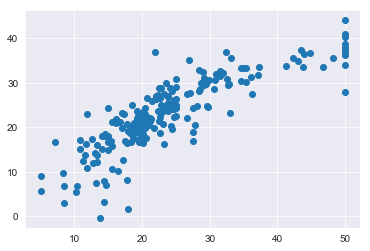

In [34]:
plt.scatter(y_test, y_pred)

Text(0.5, 1.0, 'Histogram of Residuals')

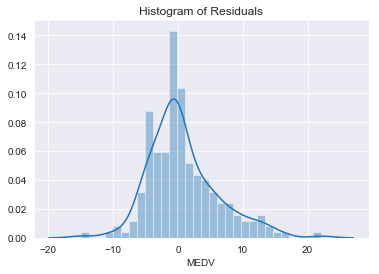

In [35]:
sns.distplot((y_test - y_pred), bins=30)
plt.title('Histogram of Residuals') # The model seems to be performing better than the just having LSTAT, but still is not normally distributed

#### Interaction Terms

In [62]:
X = bos[['LSTAT', 'AGE']]
y = bos['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [63]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_inter = interaction.fit_transform(X_train)

In [64]:
lm = LinearRegression()
lm.fit(X_train_inter, y_train)

LinearRegression()

In [65]:
coeffecients = pd.DataFrame(lm.coef_,index=['LSTAT', 'AGE', 'LSTAT:AGE'], columns=['Coefficient'])
coeffecients

,Coeffecient
LSTAT,-0.931621
AGE,0.051694
LSTAT:AGE,-0.001255


In [97]:
X_train_inter = sm.add_constant(X_train_inter)
X_train_inter = pd.DataFrame(X_train_inter, columns=['INTERCEPT', 'LSTAT', 'AGE', 'LSTAT:AGE'])
model = sm.OLS(list(y_train), X_train_inter).fit() # y_train is passed as a list to avoid a ValueError
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           9.78e-59
Time:                        14:19:54   Log-Likelihood:                -941.63
No. Observations:                 303   AIC:                             1891.
Df Residuals:                     299   BIC:                             1906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT     31.5036      1.714     18.385      0.000      28.132      34.876
LSTAT         -0.9316      0.180     -5.187      0.000      -1.285      -0.578
AGE            0.0517      0.023      2.209      0.028       0.006       0.098
LSTAT:AGE     -0.0013      0.002     -0.622      0.534      -0.005       0.003
==============================================================================
Omnibus:                       92.442   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.423
Skew:                           1.502   Prob(JB):                     1.23e-46
Kurtosis:                       5.780   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
X = bos[['LSTAT', 'AGE']]
y = bos['MEDV']
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

In [100]:
lm = LinearRegression()
lm.fit(X_inter, y)

LinearRegression()

In [101]:
coeffecients = pd.DataFrame(lm.coef_,index=['LSTAT', 'AGE', 'LSTAT:AGE'], columns=['Coefficient'])
coeffecients # Showing that sklearn will give the same results as R when not splitting the data into training and testing sets

,Coefficient
LSTAT,-1.392117
AGE,-0.000721
LSTAT:AGE,0.004156


In [102]:
X_inter = sm.add_constant(X_inter)
X_inter = pd.DataFrame(X_inter, columns=['INTERCEPT', 'LSTAT', 'AGE', 'LSTAT:AGE'] )
model = sm.OLS(y, X_inter).fit()
model.summary() # 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           4.86e-88
Time:                        14:20:02   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Non-linear Transformations of the Predictors

In [177]:
X = bos[['LSTAT']]
y = bos['MEDV']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_inter = poly.fit_transform(X)

In [178]:
poly_lm = LinearRegression()
poly_lm.fit(X_inter, y)

LinearRegression()

In [179]:
coeffecients = pd.DataFrame(poly_lm.coef_,index=['LSTAT', 'LSTAT^2'], columns=['Coefficient'])
coeffecients

,Coefficient
LSTAT,-2.332821
LSTAT^2,0.043547


In [180]:
X_inter = sm.add_constant(X_inter)
X_inter = pd.DataFrame(X_inter, columns=['INTERCEPT', 'LSTAT', 'LSTAT^2'])
mod = sm.OLS(y, X_inter).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          1.56e-112
Time:                        16:04:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT     42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
LSTAT^2        0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
lm = LinearRegression()
lstat_lm = lm.fit(X,y)
X = sm.add_constant(X)
# X_inter = pd.DataFrame(X_inter, columns=['INTERCEPT', 'LSTAT', 'LSTAT^2'])
mod2 = sm.OLS(y, X).fit()

In [182]:
table = sm.stats.anova_lm(mod2, mod)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\Taha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


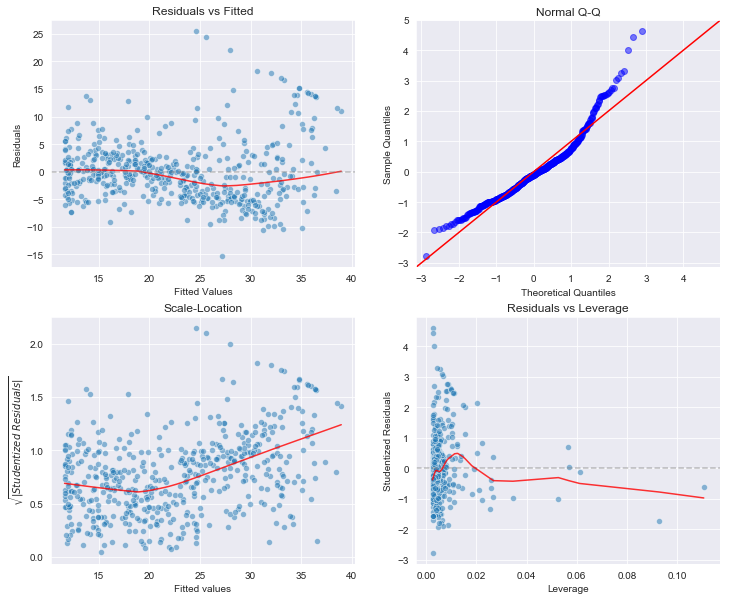

In [184]:
diagnostic_plots(mod)

In [151]:
X = bos[['LSTAT']]
y = bos['MEDV']
poly = PolynomialFeatures(degree=5, include_bias=False)
X_inter = poly.fit_transform(X)

In [152]:
poly_lm = LinearRegression()
poly_lm.fit(X_inter, y)

LinearRegression()

In [153]:
coeffecients = pd.DataFrame(poly_lm.coef_,index=['LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT^4', 'LSTAT^5'], columns=['Coefficient'])
coeffecients

,Coefficient
LSTAT,-11.991117
LSTAT^2,1.272818
LSTAT^3,-0.068274
LSTAT^4,0.001726
LSTAT^5,-0.000016


In [154]:
X_inter = sm.add_constant(X_inter)
X_inter = pd.DataFrame(X_inter, columns=['INTERCEPT', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT^4', 'LSTAT^5'])
mod = sm.OLS(y, X_inter).fit()
mod.summary() # The p values indicate that the polynomial features are all significant, but with more exploration we can see that beyond 5 degrees the features
# stop becoming significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          8.73e-122
Time:                        15:46:10   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT     67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT        -11.9911      1.526     -7.859      0.000     -14.989      -8.994
LSTAT^2        1.2728      0.223      5.703      0.000       0.834       1.711
LSTAT^3       -0.0683      0.014     -4.747      0.000      -0.097      -0.040
LSTAT^4        0.0017      0.000      4.143      0.000       0.001       0.003
LSTAT^5    -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Qualitative Predictors

In [156]:
car = pd.read_csv('Carseats.csv')

In [157]:
car.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [160]:
car.drop('Unnamed: 0', axis=1, inplace=True)

In [161]:
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [163]:
car = pd.get_dummies(car, drop_first=True)
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [175]:
y, X = dmatrices('Sales ~ CompPrice + Income + Advertising + Population + Price + Age + Education + ShelveLoc_Good + ShelveLoc_Medium + Urban_Yes + US_Yes + Income:Advertising + Price:Age', 
                 data=car)
# Using the patsy package we can create a function specifying which predictors we want and also specify interaction terms 
# We can also specifcy polynomial or logarithmic predictors 

In [170]:
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          6.14e-166
Time:                        17:30:25   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5756      1.009      6.519      0.000       4.592       8.559
CompPrice              0.0929      0.004     22.567      0.000       0.085       0.101
Income                 0.0109      0.003      4.183      0.000       0.006       0.016
Advertising            0.0702      0.023      3.107      0.002       0.026       0.115
Population             0.0002      0.000      0.433      0.665      -0.001       0.001
Price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
ShelveLoc_Good         4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc_Medium       1.9533      0.126     15.531      0.000       1.706       2.201
Urban_Yes              0.1402      0.112      1.247      0.213      -0.081       0.361
US_Yes                -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Writing Functions

In [181]:
def load_packages():
    import numpy as np 
    import pandas as pd # You can write simple functions that load the packages you want

In [180]:
load_packages()

In [66]:
def diagnostic_plots(mod):
    sns.set_style('darkgrid')
    f, ax = plt.subplots(2,2, figsize=(12,10))
    
    smoothed = lowess(mod.resid, mod.fittedvalues)
    
    sns.scatterplot(x=mod.fittedvalues, y=mod.resid, ax=ax[0,0], alpha=0.5)
    ax[0,0].plot(smoothed[:,0], smoothed[:,1], color='red', alpha=0.8)
    ax[0,0].axhline(y=0, color='grey', ls='dashed', alpha=0.5)
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_title('Residuals vs Fitted')

    sm.qqplot(mod.resid, ax=ax[0,1], fit=True, line='45', alpha=0.5)
    ax[0,1].set_title('Normal Q-Q')
    
    student_residuals = mod.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = mod.resid.index
    smoothed = lowess(sqrt_student_residuals,mod.fittedvalues)
    
    sns.scatterplot(x=mod.fittedvalues, y=sqrt_student_residuals, ax=ax[1,0], alpha=0.5)
    ax[1,0].plot(smoothed[:,0], smoothed[:,1], color='red', alpha=0.8)
    ax[1,0].set_xlabel('Fitted values')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_title('Scale-Location')
    
    smoothed = lowess(mod.get_influence().resid_studentized_internal, mod.get_influence().hat_matrix_diag)
    
    sns.scatterplot(x=mod.get_influence().hat_matrix_diag, y=mod.get_influence().resid_studentized_internal, ax=ax[1,1], alpha=0.5)
    ax[1,1].axhline(y=0, color='grey', linestyle='dashed', alpha=0.5)
    ax[1,1].plot(smoothed[:,0], smoothed[:,1], color='red', alpha=0.8)
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_title('Residuals vs Leverage')

### Applied Exercises
#### 8)

In [17]:
auto = pd.read_csv('Auto.csv')
auto.drop(auto.loc[auto['horsepower'] == '?'].index, inplace=True) 
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

In [196]:
X = auto[['horsepower']]
y = auto['mpg']
X = sm.add_constant(X)
model = sm.OLS(list(y), X).fit()
print(model.summary())
# There is a strong negative correlation between mpg and horsepower which we can see from the negative coefficient on horsepower

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        16:05:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [197]:
y_pred = model.predict(exog=X[X['horsepower'] == 98])
y_pred # Predicted mpg for horsepower equal to 98

179    24.467077
228    24.467077
dtype: float64

In [198]:
pred = model.get_prediction(exog=X[X['horsepower'] == 98])
intervals = pred.summary_frame()
intervals.rename(columns={'mean_ci_lower': 'CI Lower', 'mean_ci_upper': 'CI Upper', 'obs_ci_lower': 'PI Lower', 'obs_ci_upper': 'PI Upper'}, inplace=True)
intervals # Confidence and Prediction intervals for horsepower equal to 98

,mean,mean_se,CI Lower,CI Upper,PI Lower,PI Upper
179,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758
228,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [199]:
predictions = model.predict(X)

C:\Users\Taha\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Taha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Taha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'MPG')

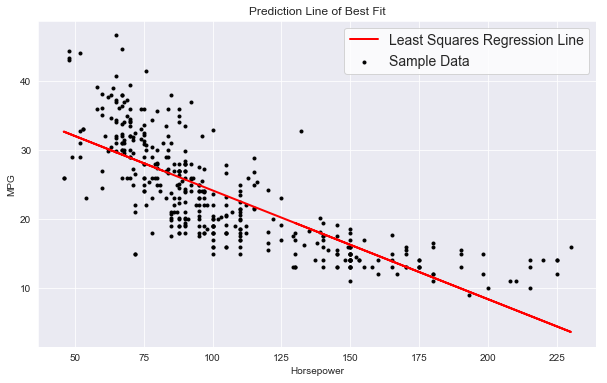

In [200]:
plt.figure(figsize=(10,6))
plt.scatter(X['horsepower'], y, color='black', marker='.', label='Sample Data')
plt.plot(X['horsepower'], predictions, color='red', linewidth=2, label='Least Squares Regression Line')
plt.title('Prediction Line of Best Fit')
plt.legend(facecolor='white', fontsize=14)
plt.xlabel('Horsepower')
plt.ylabel('MPG')

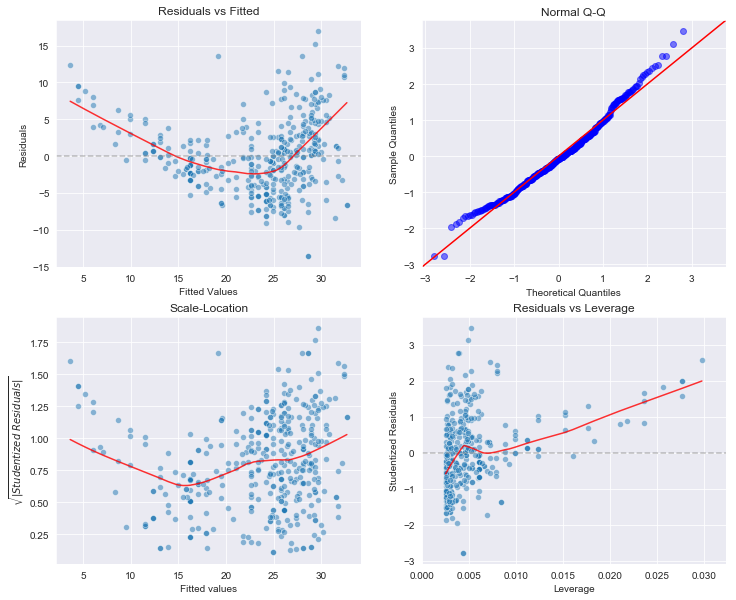

In [201]:
diagnostic_plots(model)
# The U-shape in the Residuals vs Fitted plot suggests non-linearity in the data
# The Residuals vs Leverage plot shows that there are quite a few points with high leverage

#### 9)

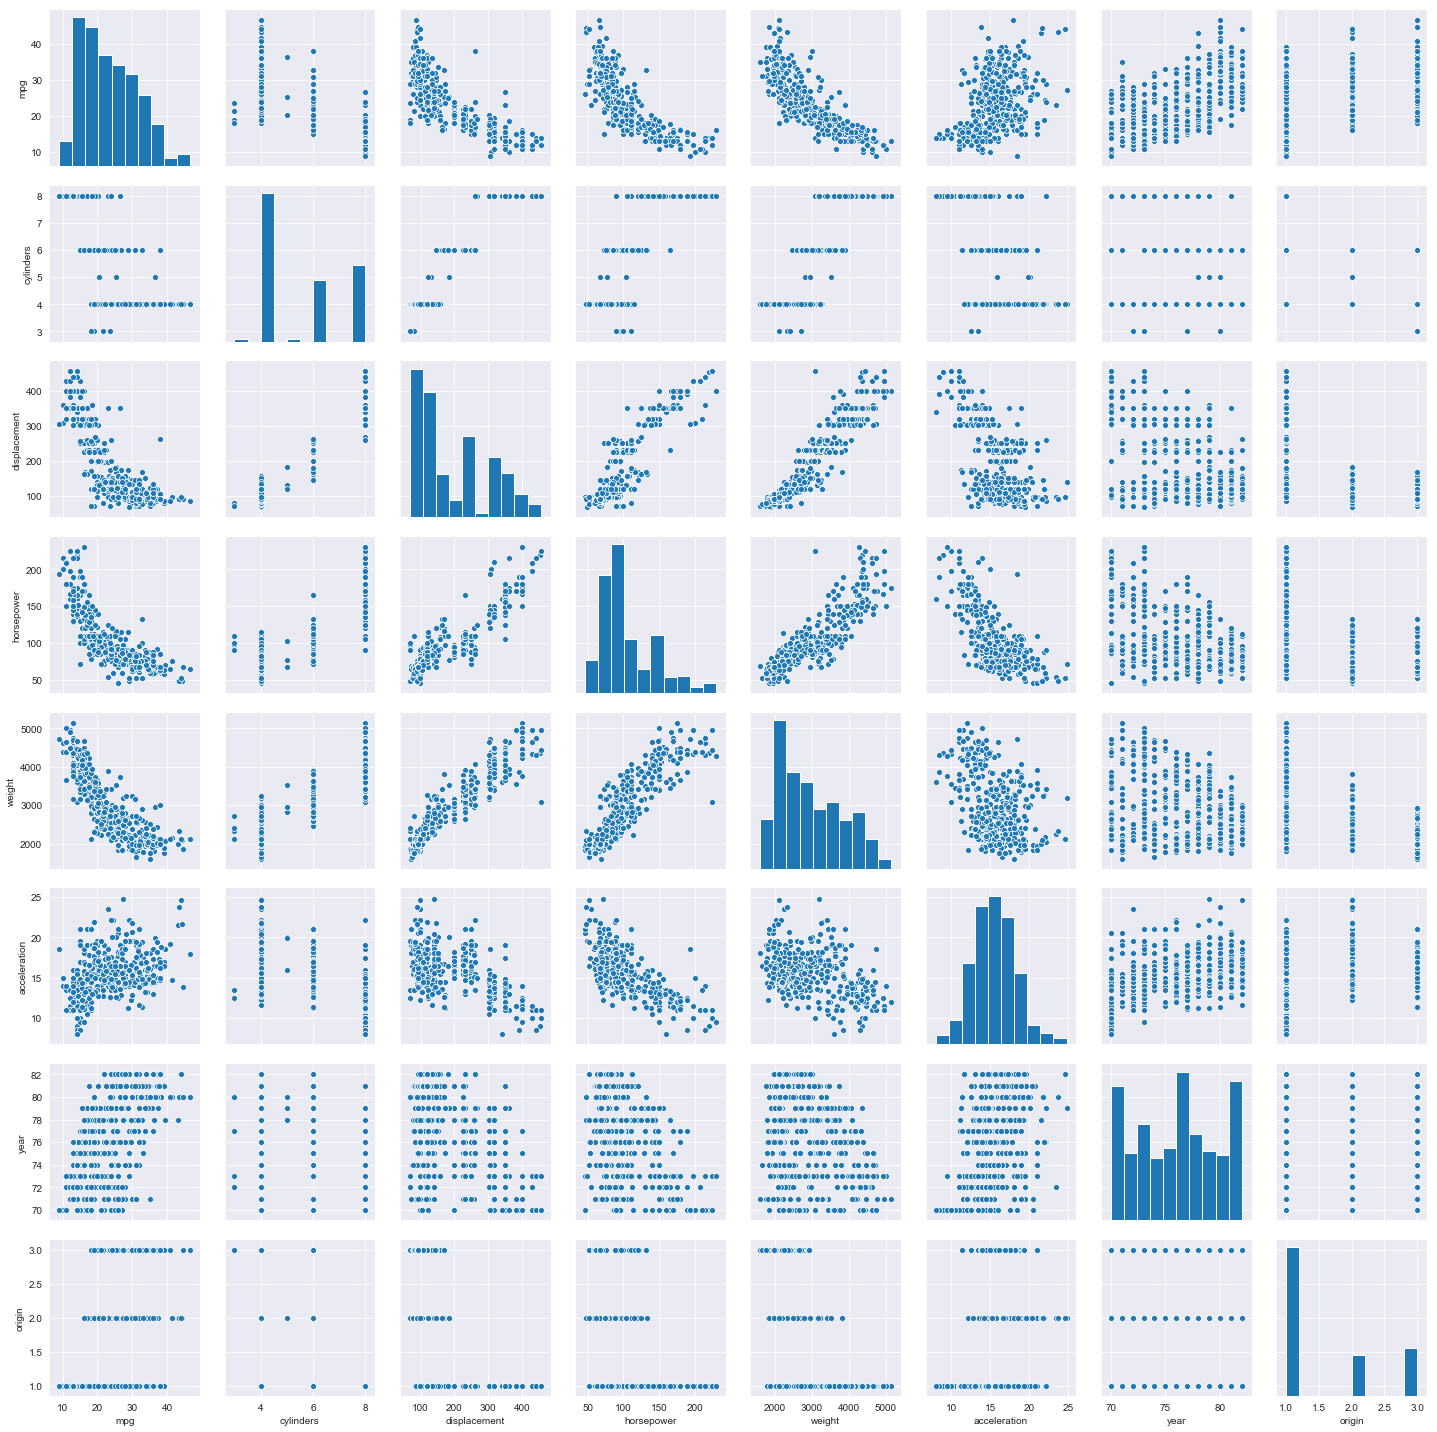

In [202]:
sns.pairplot(auto)

In [18]:
auto['cylinders'] = auto['cylinders'].astype('category')

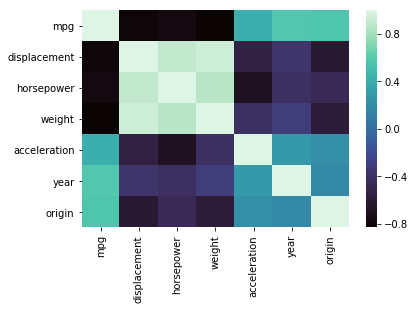

In [19]:
sns.heatmap(auto.corr(), cmap='mako')

In [20]:
X = auto.drop(['mpg', 'name'], axis=1)
y = auto['mpg']
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary() 
# All but two predictors have a significant relationship with mpg, cylinders and accelertion are not significant 
# The coefficient on year suggests that there is a positive correlation between year and mpg, where 1 unit increase on year increases mpg by 0.7508

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          2.04e-139
Time:                        13:26:15   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
diagnostic_plots(mod)
# Similar to the previous question, the U-shape on the residuals vs fitted plot suggests non-linearity in the data 
# From the residuals vs leverage plot we see that there is one value with high leverage

NameError: name 'diagnostic_plots' is not defined

In [22]:
y, X = dmatrices('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + displacement:horsepower + displacement:weight + horsepower:weight', data=auto)

In [23]:
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary() 
# The interaction term with displacement and horsepower seems to be statistically significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     200.8
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          1.21e-160
Time:                        13:26:19   Log-Likelihood:                -955.98
No. Observations:                 392   AIC:                             1940.
Df Residuals:                     378   BIC:                             1996.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8776      4.839     -1.215      0.225     -15.393       3.638
cylinders[T.4]              6.7257      1.528      4.401      0.000       3.721       9.731
cylinders[T.5]              8.6503      2.281      3.792      0.000       4.165      13.136
cylinders[T.6]              6.5936      1.806      3.652      0.000       3.043      10.144
cylinders[T.8]              7.7567      2.068      3.751      0.000       3.691      11.822
displacement               -0.0582      0.026     -2.270      0.024      -0.109      -0.008
horsepower                 -0.1586      0.048     -3.304      0.001      -0.253      -0.064
weight                     -0.0065      0.002     -4.106      0.000      -0.010      -0.003
acceleration               -0.1599      0.095     -1.675      0.095      -0.348       0.028
year                        0.7440      0.044     16.894      0.000       0.657       0.831
origin                      0.7270      0.259      2.804      0.005       0.217       1.237
displacement:horsepower     0.0003    9.7e-05      2.759      0.006    7.69e-05       0.000
displacement:weight      6.464e-06   5.78e-06      1.119      0.264    -4.9e-06    1.78e-05
horsepower:weight        1.071e-05   1.54e-05      0.697      0.486   -1.95e-05    4.09e-05
==============================================================================
Omnibus:                       60.411   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.876
Skew:                           0.805   Prob(JB):                     1.40e-29
Kurtosis:                       5.354   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
y, X = dmatrices('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + np.power(weight, 2) + (np.log(horsepower)) + np.sqrt(origin)', data=auto)

In [27]:
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# The polynomial and log transformation for weight and horsepower, respectfully, are both statisitcally significiant but the square root of origin is not

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          8.83e-161
Time:                        13:26:42   Log-Likelihood:                -955.65
No. Observations:                 392   AIC:                             1939.
Df Residuals:                     378   BIC:                             1995.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              48.0889     15.639      3.075      0.002      17.339      78.839
cylinders[T.4]          6.3101      1.511      4.176      0.000       3.339       9.281
cylinders[T.5]          7.7839      2.295      3.392      0.001       3.272      12.296
cylinders[T.6]          4.9799      1.673      2.977      0.003       1.690       8.269
cylinders[T.8]          5.5013      1.935      2.844      0.005       1.697       9.305
displacement            0.0006      0.007      0.088      0.930      -0.014       0.015
horsepower              0.0914      0.029      3.201      0.001       0.035       0.148
weight                 -0.0104      0.002     -4.350      0.000      -0.015      -0.006
acceleration           -0.2268      0.099     -2.286      0.023      -0.422      -0.032
year                    0.7539      0.046     16.484      0.000       0.664       0.844
origin                  0.2839      3.437      0.083      0.934      -6.474       7.042
np.power(weight, 2)  1.003e-06   3.19e-07      3.140      0.002    3.75e-07    1.63e-06
np.log(horsepower)    -16.2699      3.482     -4.672      0.000     -23.117      -9.422
np.sqrt(origin)         1.4460      9.371      0.154      0.877     -16.980      19.872
==============================================================================
Omnibus:                       46.484   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.772
Skew:                           0.660   Prob(JB):                     4.34e-21
Kurtosis:                       5.000   Cond. No.                     1.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 10)

In [45]:
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = np.sqrt(RSS / (len(y_true) - 2))
    return rse

In [29]:
car = pd.read_csv('Carseats.csv')
car.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
car.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [37]:
car = pd.get_dummies(car, drop_first=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  Urban_Yes         400 non-null    uint8  
 11  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(4)
memory usage: 26.7 KB


In [59]:
X = car[['Price', 'Urban_Yes', 'US_Yes']]
y = car['Sales']
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# For every 1 unit increase of Price, the Sales decreases by around 54 seats (0.0545*1000)
# The Urban predictor is not statistically significant so we can discard it from our analysis
# Since the coefficient of US_Yes = 1.2006 then the average increase of Sales is 1200 when the store is in the US

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.39e-23
Time:                        14:04:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
y_pred = mod.predict(X)
print('RSE:', RSE(y, y_pred))

RSE: 2.466272323648211


$Sales = 13.04 - 0.0545*Price - 0.0219*Urban(Yes: 1, No: 0) + 1.2006*US(Yes:1, No:0)$

In [61]:
X = car.drop('Sales', axis=1)
y = car['Sales']
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# In this case where we only fit the significant predictors 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          1.60e-166
Time:                        14:04:14   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000       1.709       2.205
Urban_Yes            0.1229      0.113      1.088      0.277      -0.099       0.345
US_Yes              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
y_pred = mod.predict(X)
print('RSE:', RSE(y, y_pred))

RSE: 1.0060539291549753


In [63]:
X = car.drop(['Sales', 'Population', 'Education', 'Urban_Yes', 'US_Yes'], axis=1)
y = car['Sales']
X = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          1.25e-170
Time:                        14:04:14   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice            0.0926      0.004     22.451      0.000       0.084       0.101
Income               0.0158      0.002      8.590      0.000       0.012       0.019
Advertising          0.1159      0.008     15.006      0.000       0.101       0.131
Price               -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.521      0.000      -0.052      -0.040
ShelveLoc_Good       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc_Medium     1.9520      0.125     15.569      0.000       1.706       2.198
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
y_pred = mod.predict(X)
print('RSE:', RSE(y, y_pred))
# The RSE, F-statistic, and R^2 value all improve moving from model a) to model e) 

RSE: 1.0117238150678145


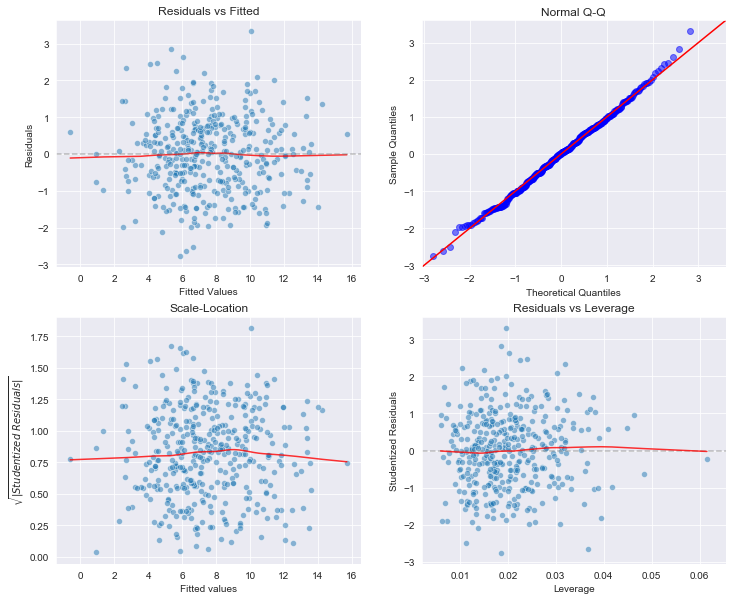

In [67]:
diagnostic_plots(mod)
# There is evidence of high leverage in one point judging from the residuals vs leverage plot

In [69]:
mod.conf_int(alpha=0.05)

,0,1
const,4.482368,6.468084
CompPrice,0.084465,0.100678
Income,0.012172,0.019398
Advertising,0.100719,0.131088
Price,-0.100568,-0.090069
Age,-0.052373,-0.039882
ShelveLoc_Good,4.535857,5.135492
ShelveLoc_Medium,1.705501,2.198484


#### 11)

In [96]:
np.random.seed(1)
X = np.random.randn(100)
y = 2*X + np.random.randn(100)
# The numbers will differ from the textbook as the seeds for the random states are different between the two programs

In [95]:
mod1 = sm.OLS(y, X).fit()
mod1.summary()
# Coefficient is 2.1067 and the Standard Error 0.106. The P-value indicates that that X is significantly significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    3.46e-36
Time:                        14:28:48   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
mod2 = sm.OLS(X, y).fit()
mod2.summary()
# the coefficient is 0.3789 and the Standard Error is 0.019. Here y is also significant and also the t-statistics are the same between the two models

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    3.46e-36
Time:                        14:15:21   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# We see that since the t-statistics are the same it follows that the p-values are the same for both regressions
# We are expressing the equation in two ways, solving for y or solving for x

In [78]:
eqn_top = np.sqrt(len(X)-1)*np.sum(X*y)
eqn_bottom = np.sqrt(np.sum(X**2)*np.sum(y**2)- np.sum(X*y)**2)
t_statistic = eqn_top/eqn_bottom
print(t_statistic)

19.791801987091205


In [92]:
X = sm.add_constant(X)
mod1 = sm.OLS(y, X).fit()
mod1.tvalues

array([ 1.56434675, 19.78258532])

In [97]:
y = sm.add_constant(y)
mod2 = sm.OLS(X, y).fit()
mod2.tvalues
# We can confirm that the t-statistic remains equal between the two models

array([-1.08955945, 19.78258532])

#### 12) c)

In [99]:
# 12 a) and b) follow from 11 

In [142]:
np.random.seed(100)
X = np.random.randn(100)
y = np.random.choice(X, size=100)

In [143]:
mod1 = sm.OLS(list(y), X).fit()
mod2 = sm.OLS(list(X), y).fit()
print(mod1.summary(), mod2.summary())
# The coefficients are the same 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.1728
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                       0.679
Time:                        14:54:12   Log-Likelihood:                         -142.83
No. Observations:                 100   AIC:                                      287.7
Df Residuals:                      99   BIC:                                      290.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 13)

In [227]:
np.random.seed(100)
X = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

In [228]:
y = -1 + 0.5*X + eps

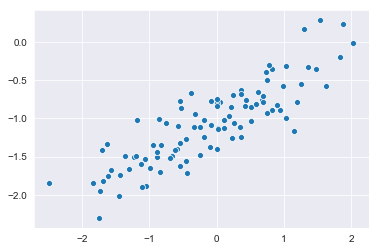

In [229]:
sns.scatterplot(X, y)

In [231]:
X_tr = sm.add_constant(X)
mod = sm.OLS(y, X_tr).fit()
mod.summary()
# Bhat0 is slightly larger than B0 and Bhat1 is slightly smaller than B1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     277.6
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.38e-30
Time:                        16:19:32   Log-Likelihood:                -8.1468
No. Observations:                 100   AIC:                             20.29
Df Residuals:                      98   BIC:                             25.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0222      0.027    -38.327      0.000      -1.075      -0.969
x1             0.4556      0.027     16.662      0.000       0.401       0.510
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
#X = pd.DataFrame(X, columns=['INTERCEPT', 'X1'])
y_pred = mod.predict(X_tr)
y_true = -1 + 0.5*X

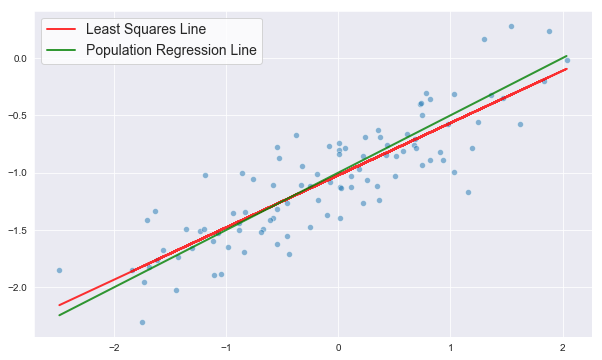

In [275]:
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(X, y, alpha=0.5)
ax.plot(X, y_pred, color='red', label='Least Squares Line', alpha=0.8, lw=2)
sns.lineplot(X, y_true, label='Population Regression Line', color='green', alpha=0.8, lw=2)
ax.legend(facecolor='white', fontsize=14)
# The rest of the question follows and is tedious to repeat

#### 14)

In [302]:
np.random.seed(100)
X1 = np.random.uniform(0,1,100)
X2 = 0.5*X1 + (np.random.randn(100)/10)
y = 2 + 2*X1 + 0.3*X2 + np.random.randn(100)
# Here B0, B1, and B2 equal 2, 2, and 0.3, respectfully

In [303]:
np.correlate(X1, X2)

array([14.42293012])

Text(0, 0.5, 'X2')

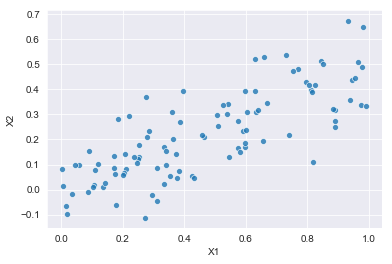

In [309]:
ax = sns.scatterplot(x=X1, y=X2, alpha=0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [313]:
y, X = dmatrices('y ~ X1 + X2')
X_tr = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# We can see that the coefficients are similar to the original values but they're not fully accurare
# Bhat1 is significant but Bhat is not significant indicated by the p-values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     17.76
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.69e-07
Time:                        16:55:55   Log-Likelihood:                -143.72
No. Observations:                 100   AIC:                             293.4
Df Residuals:                      97   BIC:                             301.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1793      0.198     11.005      0.000       1.786       2.572
X1             2.0466      0.578      3.539      0.001       0.899       3.194
X2             0.1756      0.962      0.183      0.856      -1.733       2.085
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.514
Skew:                           0.239   Prob(JB):                        0.469
Kurtosis:                       3.368   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
y, X = dmatrices('y ~ X1')
X_tr = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# Again, X1 is statsistically significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     35.83
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           3.54e-08
Time:                        16:56:17   Log-Likelihood:                -143.74
No. Observations:                 100   AIC:                             291.5
Df Residuals:                      98   BIC:                             296.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1790      0.197     11.059      0.000       1.788       2.570
X1             2.1295      0.356      5.986      0.000       1.424       2.836
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.812
Skew:                           0.256   Prob(JB):                        0.404
Kurtosis:                       3.417   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
y, X = dmatrices('y ~ X2')
X_tr = sm.add_constant(X)
mod = sm.OLS(y, X).fit()
mod.summary()
# With X2 alone we see that it is significant 
# These two results do not contradict eachother since X1 and X2 are colinear, meaning that X2's effect on y is masked by X1 or vice-versa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     20.57
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.63e-05
Time:                        16:57:21   Log-Likelihood:                -149.79
No. Observations:                 100   AIC:                             303.6
Df Residuals:                      98   BIC:                             308.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5529      0.177     14.413      0.000       2.201       2.904
X2             2.8513      0.629      4.535      0.000       1.604       4.099
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.106
Skew:                          -0.035   Prob(JB):                        0.949
Kurtosis:                       3.143   Cond. No.                         6.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 15 d)

In [316]:
# 15 a) - c) are repeats of what we have done already this chapter but we will be doing d) as it allows us to explore something we have not tried yet

In [317]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [336]:
cols = list(bos.columns)
cols.remove('CRIM')
for i in cols:
    X = bos[[i]]
    y = bos['CRIM']
    interaction = PolynomialFeatures(degree=3, include_bias=False)
    X_inter = interaction.fit_transform(X)
    X_tr = sm.add_constant(X_inter)
    X_tr = pd.DataFrame(X_tr, columns=['INTERCEPT', '{}'.format(i), '{}^2'.format(i), '{}^3'.format(i)])
    mod = sm.OLS(y, X_tr).fit()
    print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.28e-06
Time:                        17:19:37   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT      4.8461      0.433     11.192      0.0

In [338]:
X = bos.drop('CRIM', axis=1)
y = bos['CRIM']
X_tr = sm.add_constant(X)
mod = sm.OLS(y, X_tr).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.57e-56
Time:                        17:26:16   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.019       2.818      31.248
ZN             0.0449      0.019      2.394      0.017       0.008       0.082
INDUS         -0.0639      0.083     -0.766      0.444      -0.228       0.100
CHAS          -0.7491      1.180     -0.635      0.526      -3.068       1.570
NOX          -10.3135      5.276     -1.955      0.051     -20.679       0.052
RM             0.4301      0.613      0.702      0.483      -0.774       1.634
AGE            0.0015      0.018      0.081      0.935      -0.034       0.037
DIS           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
RAD            0.5882      0.088      6.680      0.000       0.415       0.761
TAX           -0.0038      0.005     -0.733      0.464      -0.014       0.006
PTRATIO       -0.2711      0.186     -1.454      0.147      -0.637       0.095
B             -0.0075      0.004     -2.052      0.041      -0.015      -0.000
LSTAT          0.1262      0.076      1.667      0.096      -0.023       0.275
MEDV          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""